<a href="https://colab.research.google.com/github/Nandhana1334/Stock-Market-Prediction-/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Data Collection
import pandas_datareader as pdr
key="77f0b527402fee7d0e60a415eca7bb3004181f3f"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)


<ipython-input-2-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-26 00:00:00+00:00,184.43,186.53,182.54,182.99,24569201,44.060086,44.561773,43.608567,43.716072,98276804,0.0,1.0
1,AAPL,2018-06-27 00:00:00+00:00,184.16,187.28,184.03,185.23,25285328,43.995583,44.740947,43.964526,44.251205,101141312,0.0,1.0
2,AAPL,2018-06-28 00:00:00+00:00,185.50,186.21,183.80,184.10,17365235,44.315707,44.485326,43.909580,43.981249,69460940,0.0,1.0
3,AAPL,2018-06-29 00:00:00+00:00,185.11,187.19,182.91,186.29,22737666,44.222537,44.719446,43.696960,44.504437,90950664,0.0,1.0
4,AAPL,2018-07-02 00:00:00+00:00,187.18,187.30,183.42,183.82,17731343,44.717057,44.745725,43.818798,43.914358,70925372,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-06-16 00:00:00+00:00,184.92,186.990,184.2700,186.73,101256225,184.92,186.990,184.2700,186.73,101256225,0.0,1.0
1253,AAPL,2023-06-20 00:00:00+00:00,185.01,186.100,184.4100,184.41,49799092,185.01,186.100,184.4100,184.41,49799092,0.0,1.0
1254,AAPL,2023-06-21 00:00:00+00:00,183.96,185.410,182.5901,184.90,49515697,183.96,185.410,182.5901,184.90,49515697,0.0,1.0
1255,AAPL,2023-06-22 00:00:00+00:00,187.00,187.045,183.6700,183.74,51245327,187.00,187.045,183.6700,183.74,51245327,0.0,1.0
1256,AAPL,2023-06-23 00:00:00+00:00,186.68,187.560,185.0100,185.55,53116996,186.68,187.560,185.0100,185.55,53116996,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       184.43
1       184.16
2       185.50
3       185.11
4       187.18
         ...  
1252    184.92
1253    185.01
1254    183.96
1255    187.00
1256    186.68
Name: close, Length: 1257, dtype: float64

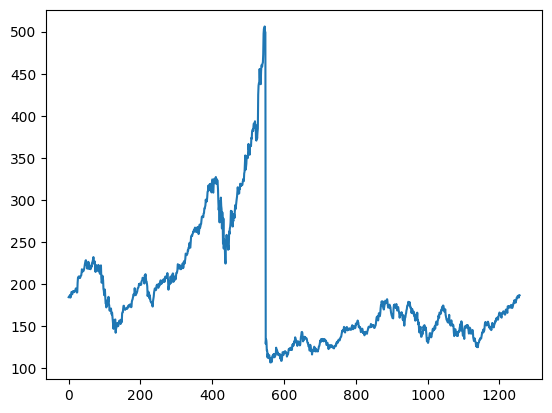

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [12]:
import numpy as np

In [13]:
df1

0       184.43
1       184.16
2       185.50
3       185.11
4       187.18
         ...  
1252    184.92
1253    185.01
1254    183.96
1255    187.00
1256    186.68
Name: close, Length: 1257, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.19433939]
 [0.19366312]
 [0.19701941]
 ...
 [0.19316218]
 [0.20077646]
 [0.19997495]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 440)

In [18]:
train_data

array([[1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],


In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 411ms/step - loss: 0.0418 - val_loss: 0.0022
Epoch 2/100
12/12 [==============================] - 3s 287ms/step - loss: 0.0132 - val_loss: 0.0013
Epoch 3/100
12/12 [==============================] - 4s 323ms/step - loss: 0.0105 - val_loss: 4.8798e-04
Epoch 4/100
12/12 [==============================] - 4s 374ms/step - loss: 0.0092 - val_loss: 9.3937e-04
Epoch 5/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0088 - val_loss: 8.7890e-04
Epoch 6/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0072 - val_loss: 3.0454e-04
Epoch 7/100
12/12 [==============================] - 4s 384ms/step - loss: 0.0062 - val_loss: 2.9516e-04
Epoch 8/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0058 - val_loss: 9.2171e-04
Epoch 9/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0060 - val_loss: 3.4735e-04
Epoch 10/100
12/12 [==============================] - 4s 324ms

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.12.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 42ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.29403219797302

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

159.01215793444857

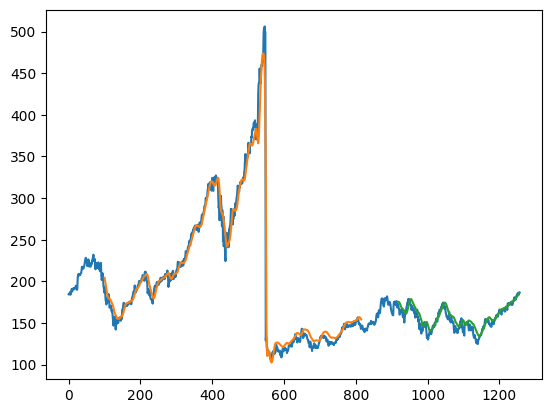

In [36]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.144821540388

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

ValueError: ignored

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1257

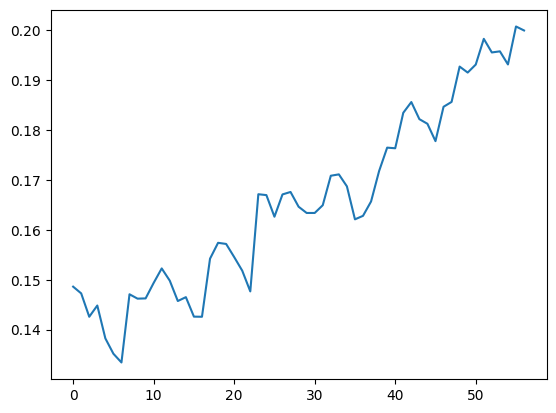

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

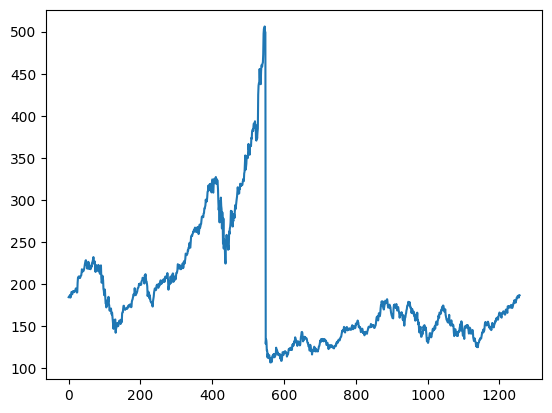

In [49]:
plt.plot(df3)